In [1]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline


In [50]:
img = cv2.imread('./dataset/justin bieber - Google Search/jb2faces.jpg')
img.shape

(675, 1200, 3)

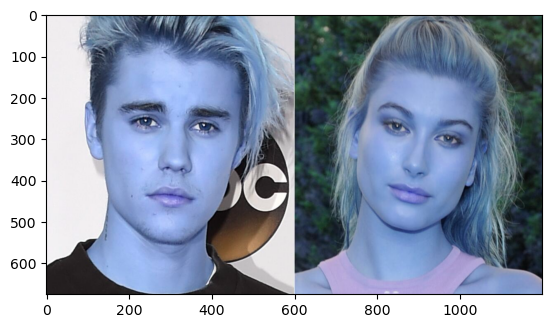

In [51]:
plt.imshow(img)

In [52]:
grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
grey.shape

(675, 1200)

In [53]:
grey

array([[238, 238, 238, ...,  87,  86,  86],
       [238, 238, 238, ...,  86,  85,  85],
       [238, 238, 238, ...,  83,  82,  82],
       ...,
       [ 31,  31,  31, ..., 169, 169, 169],
       [ 31,  31,  31, ..., 169, 169, 169],
       [ 31,  31,  31, ..., 169, 169, 169]], dtype=uint8)

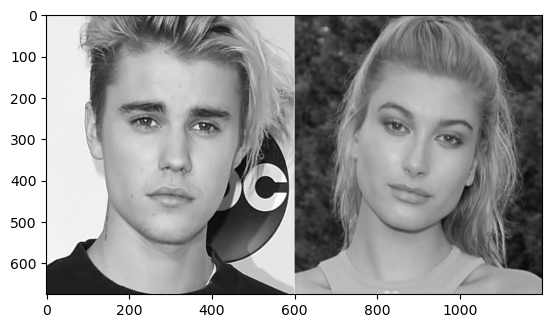

In [54]:
plt.imshow(grey,cmap='gray')

In [91]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(img, 1.3, 5)
faces

array([[108, 101, 402, 402],
       [719, 134, 381, 381]])

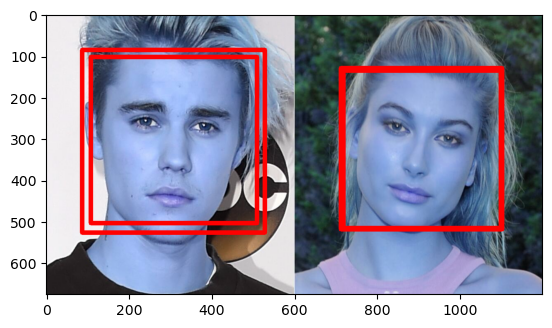

In [92]:
for i in range(len(faces)):
    (x,y,w,h) = faces[i]
    face_img=cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),10)
plt.imshow(face_img)

In [106]:
def get_cropped_image_if_2_eyes(image_path):
    roi_color_imgs=[]
    img = cv2.imread(image_path)
    if img is None:
        print(f"Error: Unable to load image at path {image_path}")
        return None
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(img, 1.3, 5)
    for i in range(len(faces)):
        (x,y,w,h) = faces[i]
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_color)
        if len(eyes) >= 2:
            roi_color_imgs.append(roi_color)
    return roi_color_imgs
#     for (x,y,w,h) in faces:
#         roi_gray = gray[y:y+h, x:x+w]
#         roi_color = img[y:y+h, x:x+w]
#         eyes = eye_cascade.detectMultiScale(roi_gray)
#         if len(eyes) >= 2:
#             return roi_color
        

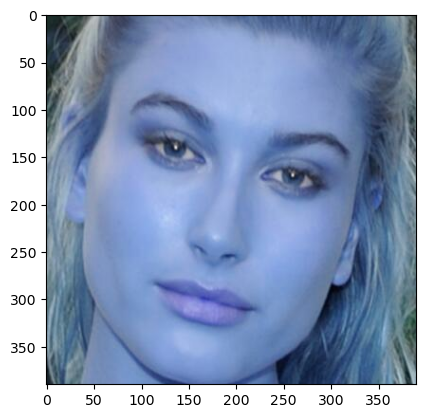

In [107]:
cropped_image = get_cropped_image_if_2_eyes('./dataset/justin bieber - Google Search/jb2faces.jpg')[1]
plt.imshow(cropped_image)


In [108]:
path_to_data = "./dataset/"
path_to_cr_data = "./dataset/cropped/"

In [110]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [113]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)
img_dirs

['./dataset/cropped',
 './dataset/drake - Google Search',
 './dataset/justin bieber - Google Search',
 './dataset/taylor swift - Google Search',
 './dataset/the weeknd - Google Search']

In [111]:
cropped_image_dirs = []
celebrity_file_names_dict = {}
for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1].split('-')[0].strip()
    celebrity_file_names_dict[celebrity_name] = []
    for entry in os.scandir(img_dir):
        roi_color_imgs = get_cropped_image_if_2_eyes(entry.path)
        if roi_color_imgs is not None:
            for i in range(len(roi_color_imgs)):
                roi_color = roi_color_imgs[i]
                cropped_folder = path_to_cr_data + celebrity_name
                if not os.path.exists(cropped_folder):
                    os.makedirs(cropped_folder)
                    cropped_image_dirs.append(cropped_folder)
                    print("Generating cropped images in folder: ",cropped_folder)

                cropped_file_name = celebrity_name + str(count) + ".png"
                cropped_file_path = cropped_folder + "/" + cropped_file_name 

                cv2.imwrite(cropped_file_path, roi_color)
                celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
                count += 1    


Generating cropped images in folder:  ./dataset/cropped/drake
Generating cropped images in folder:  ./dataset/cropped/justin bieber
Error: Unable to load image at path ./dataset/justin bieber - Google Search\hailey-bieber-thinks-she-is-the-muse-of-her-husband-justin-biebers-albums-but-does-he-think-so-an-old-video-resurfaces-when-he-claimed-his-ex-gf-selena-gomez-was-his-inspiration.jpg
Generating cropped images in folder:  ./dataset/cropped/taylor swift
Generating cropped images in folder:  ./dataset/cropped/the weeknd
Error: Unable to load image at path ./dataset/the weeknd - Google Search\abel-1.png.crdownload


In [114]:
celebrity_file_names_dict

{'cropped': [],
 'drake': ['./dataset/cropped/drake/drake1.png',
  './dataset/cropped/drake/drake2.png',
  './dataset/cropped/drake/drake3.png',
  './dataset/cropped/drake/drake4.png',
  './dataset/cropped/drake/drake5.png',
  './dataset/cropped/drake/drake6.png',
  './dataset/cropped/drake/drake7.png',
  './dataset/cropped/drake/drake8.png',
  './dataset/cropped/drake/drake9.png',
  './dataset/cropped/drake/drake10.png',
  './dataset/cropped/drake/drake11.png',
  './dataset/cropped/drake/drake12.png',
  './dataset/cropped/drake/drake13.png',
  './dataset/cropped/drake/drake14.png',
  './dataset/cropped/drake/drake15.png',
  './dataset/cropped/drake/drake16.png',
  './dataset/cropped/drake/drake17.png',
  './dataset/cropped/drake/drake18.png',
  './dataset/cropped/drake/drake19.png',
  './dataset/cropped/drake/drake20.png',
  './dataset/cropped/drake/drake21.png',
  './dataset/cropped/drake/drake22.png',
  './dataset/cropped/drake/drake23.png',
  './dataset/cropped/drake/drake24.png',
